### Business Understanding
Overview
What is sepsis?
Sepsis is a life-threatening medical emergency caused by your body’s overwhelming response to an infection. Without urgent treatment, it can lead to tissue damage, organ failure and death.

Sepsis is your body’s extreme reaction to an infection. When you have an infection, your immune system works to try to fight it. But sometimes your immune system stops fighting the infection and starts damaging your normal tissues and organs, leading to widespread inflammation throughout your body.

At the same time, an abnormal chain reaction in your clotting system can cause blood clots to form in your blood vessels. This reduces blood flow to the different organs of your body and can cause significant damage or even failure.

What are the three stages of sepsis?
Healthcare providers used to organize sepsis into three stages: sepsis, severe sepsis and septic shock. Now, they identify the condition on a more fluid scale. This scale ranges from infection and bacteremia (bacteria in your bloodstream) to sepsis and septic shock, which can lead to dysfunction of multiple organs and even death.

Who does sepsis affect?
Sepsis can affect anyone, but people with any kind of infection, especially bacteremia, are at a particularly high risk.

Other people who are at a high risk include:

People older than 65 years old, newborns and infants, and pregnant people. People with medical conditions such as diabetes, obesity, cancer and kidney disease. People with weakened immune systems. People who are in the hospital for other medical reasons. People with severe injuries, such as large burns or wounds. People with catheters, IVs or breathing tubes.

How common is sepsis?
More than 1.7 million people in the United States receive a diagnosis of sepsis each year. There are differences in sepsis rates among different demographic groups. Sepsis is more common among older adults, with incidence increasing with each year after the age of 65 years old. Source

Objective
The goal of this project is to create an API using FastAPI framework to predict if one is will be Positive or Negative for Sepsis

Metric
Due to the life threatening nature of Sepsis it will be dangerous to predictive Negative if actual turns out to be Positive, ML model will seek to increase the Precision score

Dataset Description:
The provided data is a modified version of a publicly available data source, and is subject to copyright.
Donor of database:

                 - The Johns Hopkins University
                 - Johns Hopkins Road
                 - Laurel, MD 20707
                 - (301) 953-6231
Licence agreement:

The dataset can only be used for the purpose of this assignment. Sharing or distributing this data or using this data for any other commercial or non-commercial purposes is prohibited.
Data Dictionary

ID: number to represent patient ID
PRG: Plasma glucose
PL: Blood Work Result-1 (mu U/ml)
PR: Blood Pressure (mm Hg)
SK: Blood Work Result-2 (mm)
TS: Blood Work Result-3 (mu U/ml)
M11: Body mass index (weight in kg/(height in m)^2)
BD2: Blood Work Result-4 (mu U/ml)
Age: patients age (years)
Insurance: If a patient holds a valid insurance card
Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise
ANALYTICAL QUESTIONS
What is the proportion of patients with a valid insurance card?

What is the distribution of body mass index (BMI) in the dataset?

How does blood pressure (PR) vary with age among patients?

Does the presence of valid insurance affect the likelihood of developing sepssis?

What is the link between Age, Body mass index (M11) and Sepsis

HYPOTHESIS
The null hypothesis : Patient's Insurance does not influence Sepssis
The alternate hypothesis : Patient's Insurance influences Sepssis

The null hypothesis : There is no correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)
The alternate hypothesis : There is a correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

The null hypothesis : - There is no correlation between blood pressure (PR) and the likelihood of developing sepsis?
The alternate hypothesis : There is a correlation between blood pressure (PR) and the likelihood of developing sepsis?

The null hypothesis : Age does not have a significant impact on the development of sepsis in patients
The alternate hypothesis : Age has a significant impact on the development of sepsis in patients

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

from scipy.stats import ttest_ind

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.model_selection import train_test_split 


from sklearn.base import BaseEstimator, TransformerMixin

from scipy import stats


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier
)

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import HuberRegressor

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve,
    auc, 
    confusion_matrix, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import chi2_contingency
import joblib

import os
import pandas as pd
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import joblib
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings('ignore')

In [138]:
data = pd.read_csv('./Data/Paitients_Files_Train.csv')

In [139]:
data.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4  ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [141]:
data.describe(include='all').T

count unique        top freq        mean         std    min    25%  \
ID           599    599  ICU200010    1         NaN         NaN    NaN    NaN   
PRG        599.0    NaN        NaN  NaN    3.824708    3.362839    0.0    1.0   
PL         599.0    NaN        NaN  NaN  120.153589   32.682364    0.0   99.0   
PR         599.0    NaN        NaN  NaN   68.732888   19.335675    0.0   64.0   
SK         599.0    NaN        NaN  NaN   20.562604   16.017622    0.0    0.0   
TS         599.0    NaN        NaN  NaN   79.460768  116.576176    0.0    0.0   
M11        599.0    NaN        NaN  NaN   31.920033    8.008227    0.0   27.1   
BD2        599.0    NaN        NaN  NaN    0.481187    0.337552  0.078  0.248   
Age        599.0    NaN        NaN  NaN   33.290484   11.828446   21.0   24.0   
Insurance  599.0    NaN        NaN  NaN    0.686144    0.464447    0.0    0.0   
Sepssis      599      2   Negative  391         NaN         NaN    NaN    NaN   

             50%    75%    max  
ID           NaN    NaN    NaN  
PRG          3.0    6.0   17.0  
PL         116.0  140.0  198.0  
PR          70.0   80.0  122.0  
SK          23.0   32.0   99.0  
TS          36.0  123.5  846.0  
M11         32.0  36.55   67.1  
BD2        0.383  0.647   2.42  
Age         29.0   40.0   81.0  
Insurance    1.0    1.0    1.0  
Sepssis      NaN    NaN    NaN

In [142]:
data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [143]:
numerics=data.select_dtypes(include='number')
cat = data.select_dtypes(include='object')

In [144]:
numerics

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0      6  148  72  35    0  33.6  0.627   50          0
1      1   85  66  29    0  26.6  0.351   31          0
2      8  183  64   0    0  23.3  0.672   32          1
3      1   89  66  23   94  28.1  0.167   21          1
4      0  137  40  35  168  43.1  2.288   33          1
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
594    6  123  72  45  230  33.6  0.733   34          0
595    0  188  82  14  185  32.0  0.682   22          1
596    0   67  76   0    0  45.3  0.194   46          1
597    1   89  24  19   25  27.8  0.559   21          0
598    1  173  74   0    0  36.8  0.088   38          1

[599 rows x 9 columns]

In [145]:
cat

ID   Sepssis
0    ICU200010  Positive
1    ICU200011  Negative
2    ICU200012  Positive
3    ICU200013  Negative
4    ICU200014  Positive
..         ...       ...
594  ICU200604  Negative
595  ICU200605  Positive
596  ICU200606  Negative
597  ICU200607  Negative
598  ICU200608  Positive

[599 rows x 2 columns]

In [146]:
data=data.drop(columns='ID')

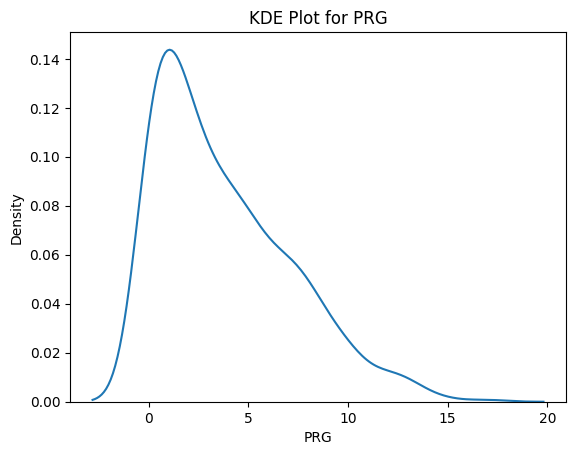

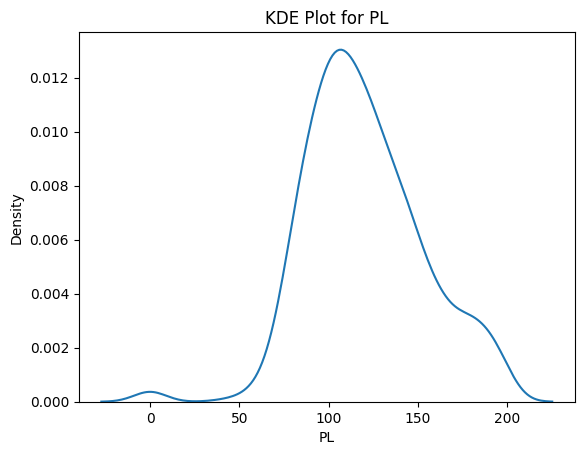

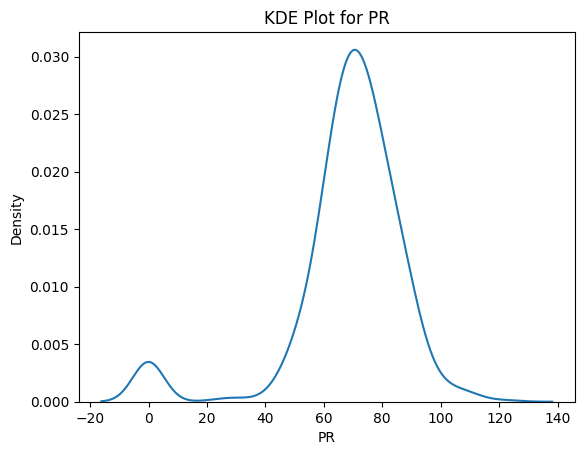

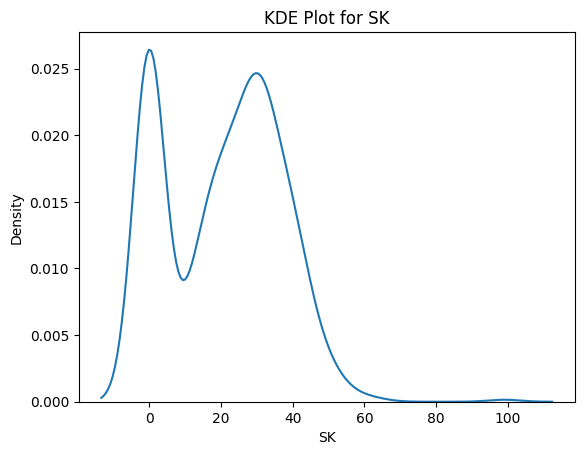

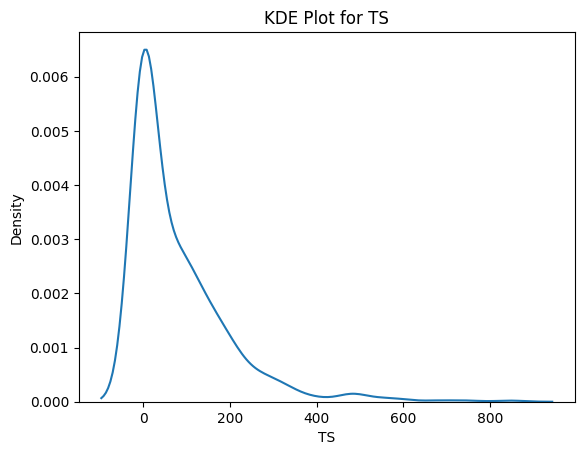

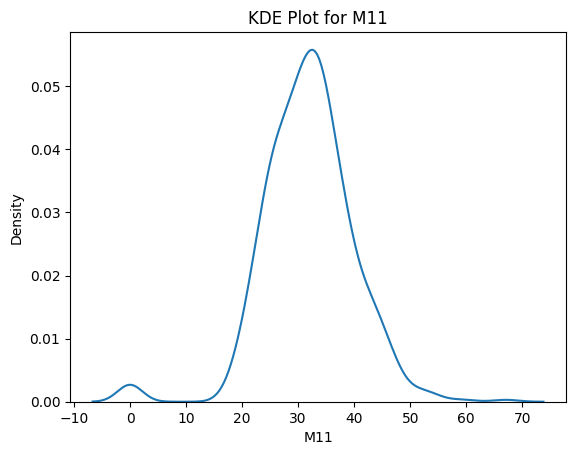

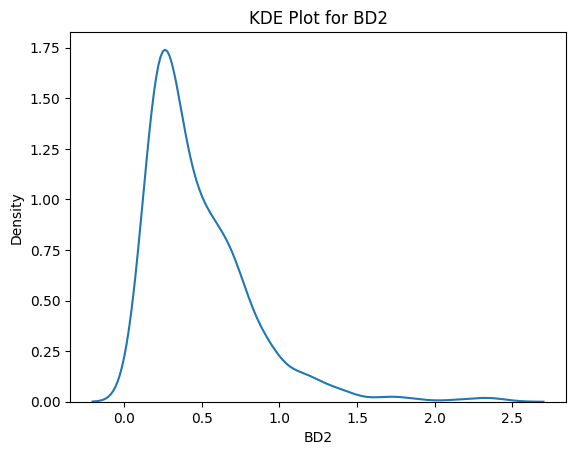

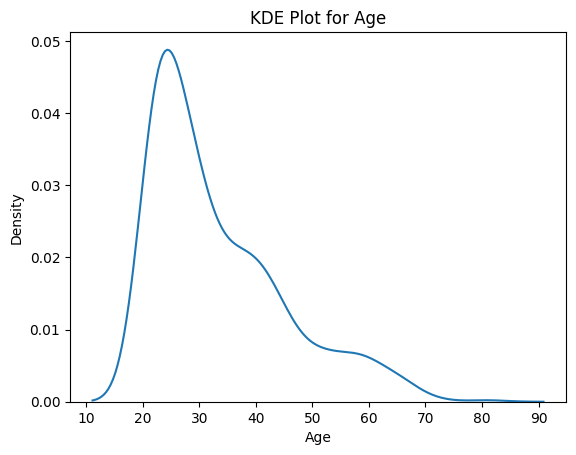

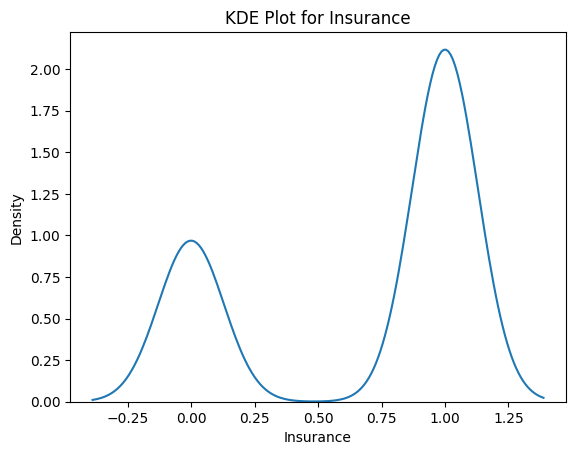

In [147]:
for i in numerics.columns:
    sns.kdeplot(data=numerics, x=i)
    plt.title(f'KDE Plot for {i}')
    plt.show()

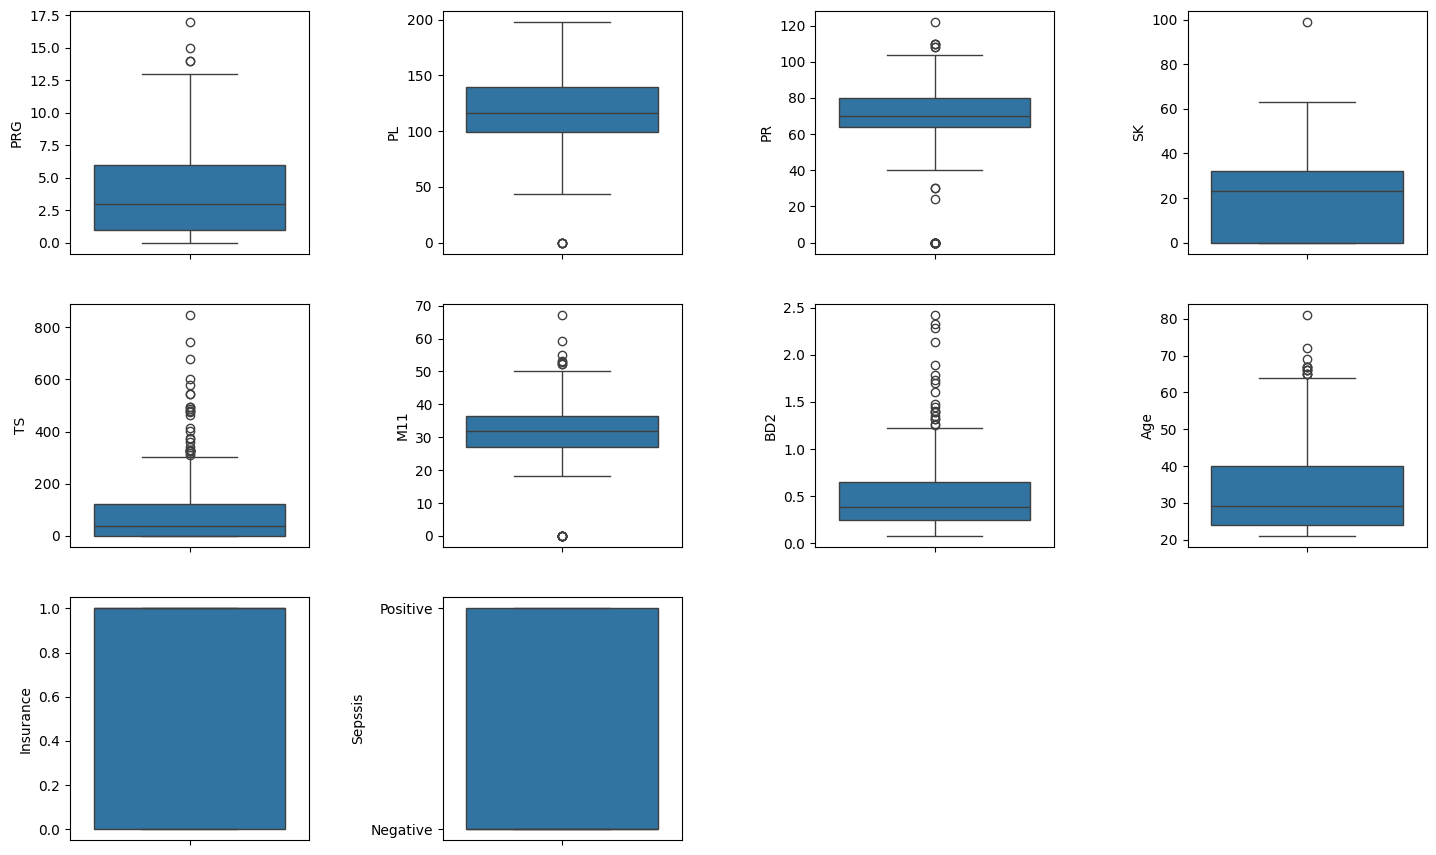

In [148]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(data):
    plt.subplot(5,4, i + 1)
    sns.boxplot(data,y=data[variable])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

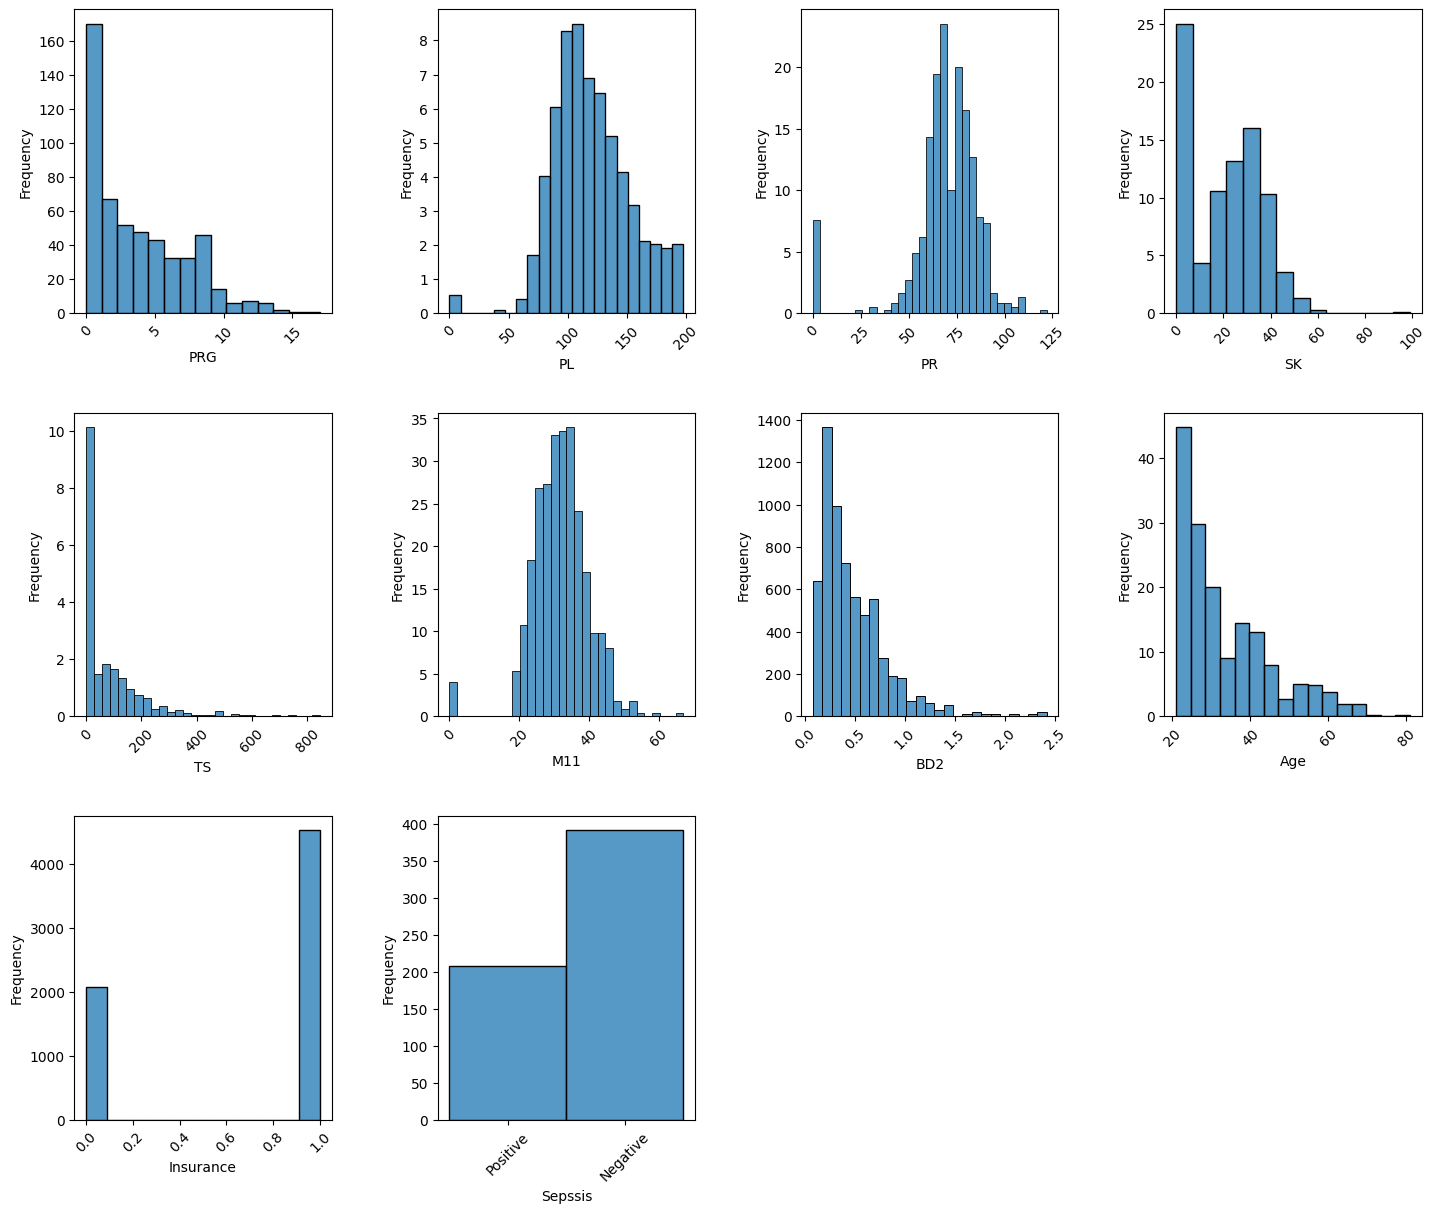

In [149]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(data):
    plt.subplot(5,4, i + 1)
    sns.histplot(data,x=data[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

<Axes: ylabel='Density'>

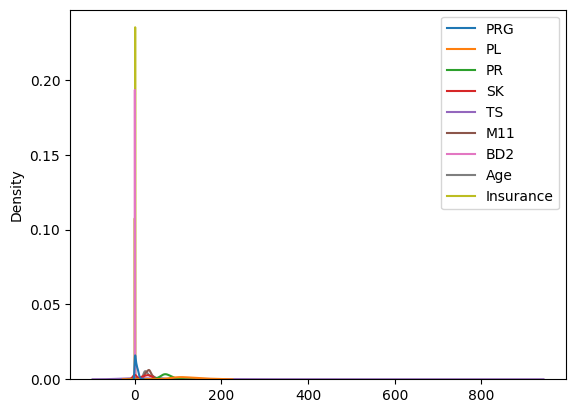

In [150]:
sns.kdeplot(data=data)

<Axes: >

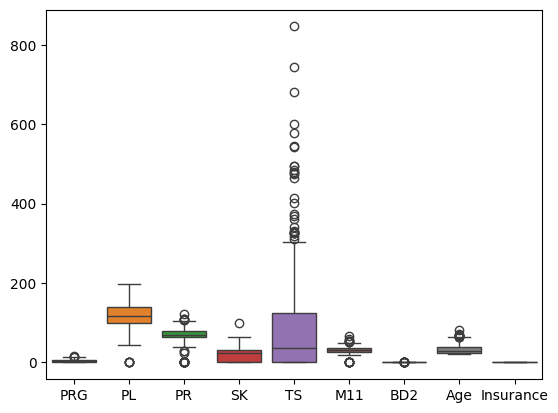

In [85]:
sns.boxplot(data=data)

<Axes: >

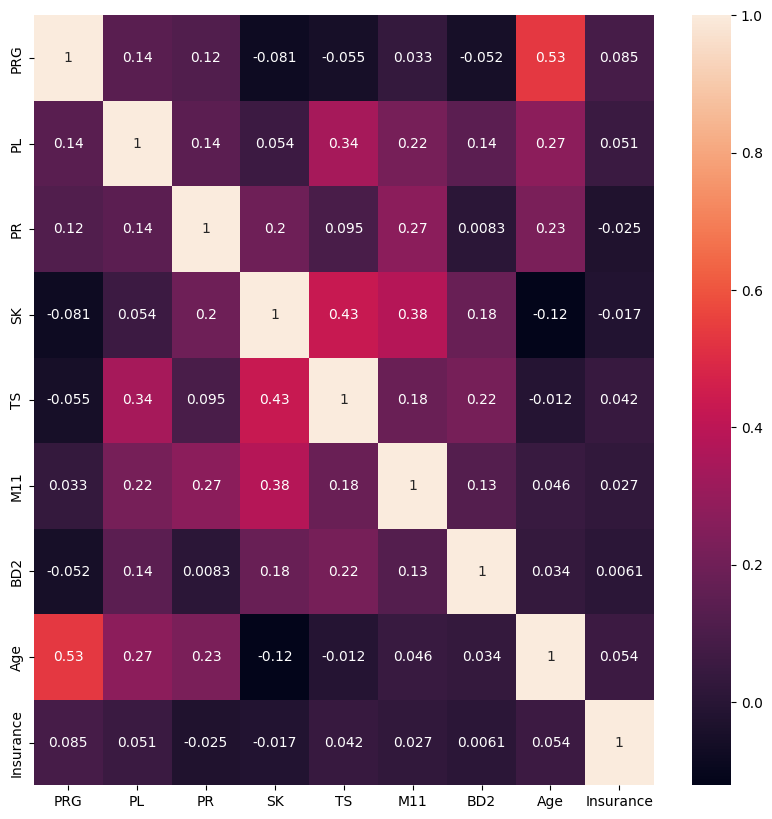

In [86]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=data.drop(['Sepssis'], axis=1).corr(), annot=True)

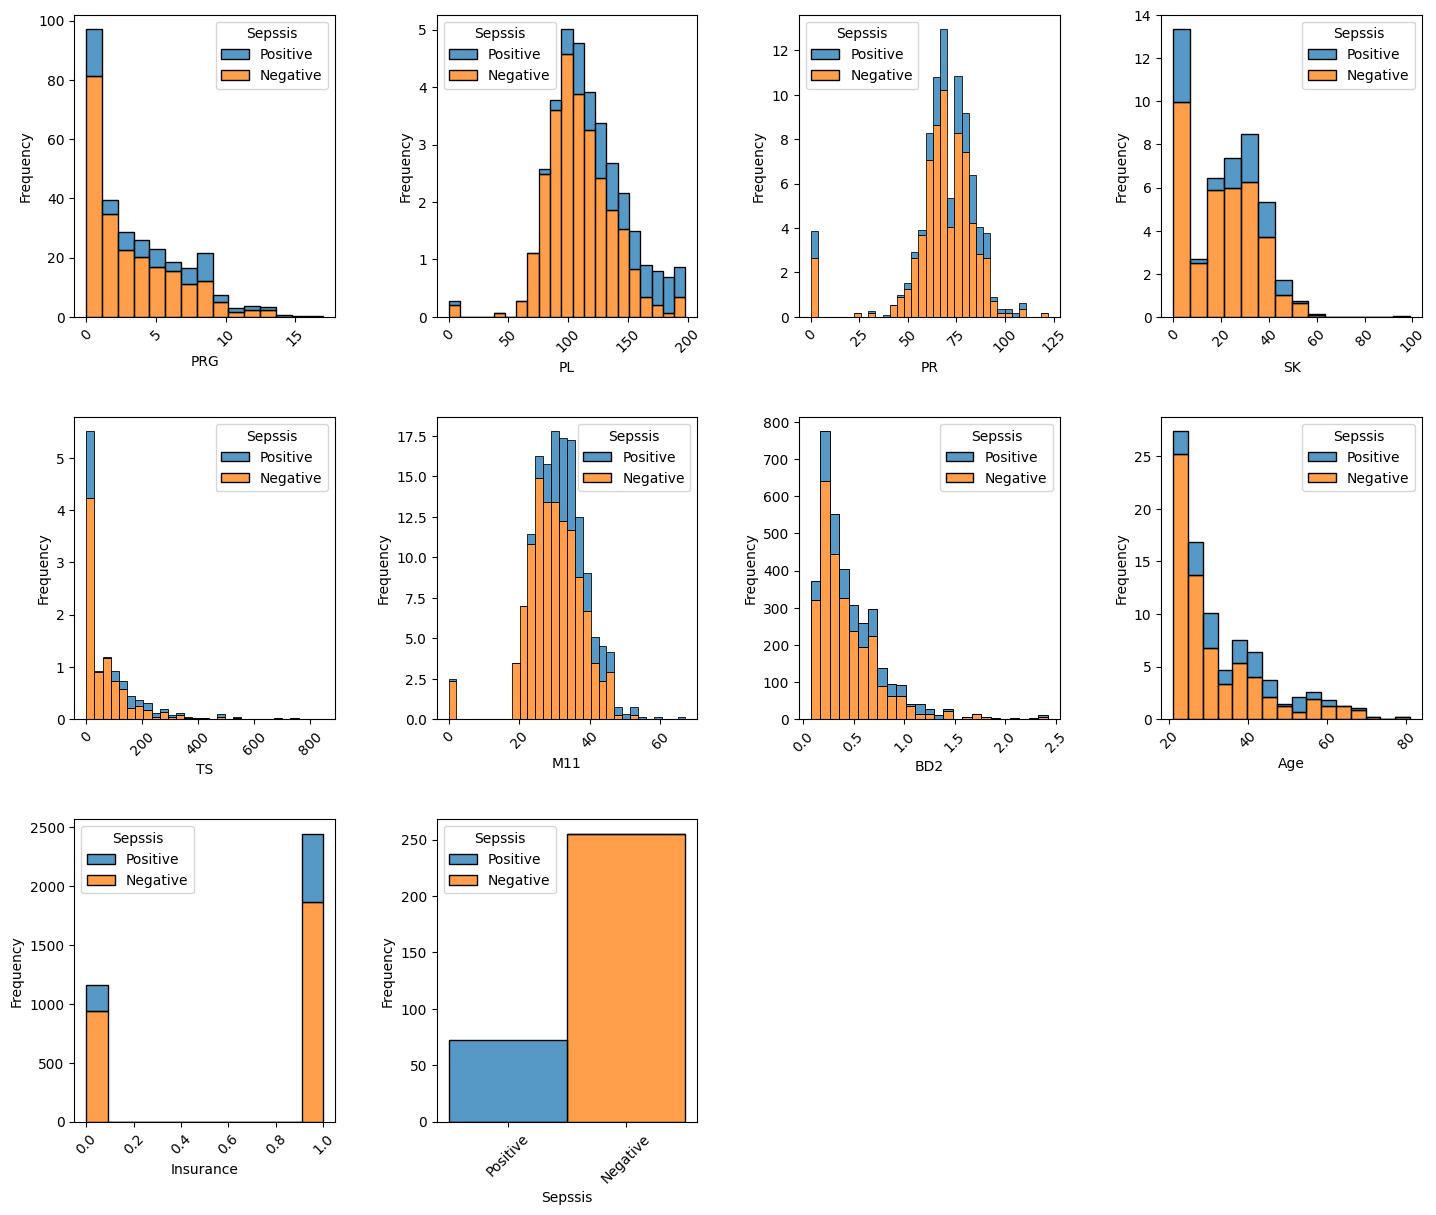

In [87]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(data):
    plt.subplot(5,4, i + 1)
    sns.histplot(data,x=data[variable], stat='frequency', hue='Sepssis', multiple='stack')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

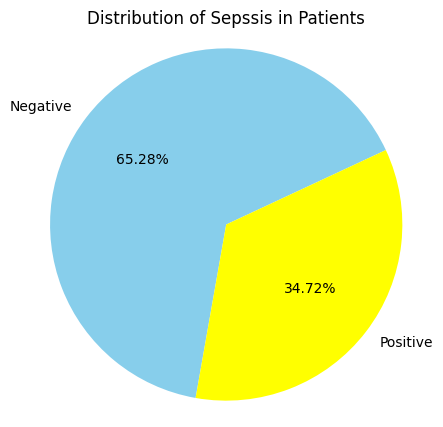

In [88]:
sepssis_counts = data['Sepssis'].value_counts()
explode = [0.05 if label == 'Yes' else 0 for label in sepssis_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(sepssis_counts, labels=sepssis_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'yellow'])
plt.axis('equal')
plt.title('Distribution of Sepssis in Patients')
plt.show()

### Hypothesis Tests 1 



 ### null hypothesis: there a no significant difference in plasma glucose levels between patients who develop sepsis and those who do not?
 ### alternative hyp: there is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

In [89]:
import pandas as pd
from scipy.stats import mannwhitneyu



# Separate the groups based on sepsis outcome
sepsis_positive = data[data['Sepssis'] == 'Positive']['PRG']

sepsis_negative = data[data['Sepssis'] == 'Negative']['PRG']

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(sepsis_positive, sepsis_negative)

# Print the results
print(f'Mann-Whitney U Test: U-statistic = {stat}, p-value = {p_value}')

# Interpretation of the results
if p_value < 0.05:
    print('There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')
else:
    print('There is no significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')


Mann-Whitney U Test: U-statistic = 49635.0, p-value = 7.517335229649623e-06
There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.


### Hypothesis Test 2
(Blood Work Result-1)

### Null Hypothesis (H0): There is no significant difference in Blood Work Results between patients who develop sepssis and those who do not.
### Alternative Hypothesis (H1): There is a significant difference in Blood Work Results between patients who develop sepsis and those who do not.

In [90]:


# List of blood work result columns
blood_work_columns = ['PL', 'SK', 'TS', 'BD2']


In [91]:

# Initialize a dictionary to store test results
results = {}


In [92]:

# Separate the groups based on sepsis outcome
sepsis_positive = data[data['Sepssis'] == 'Positive']
sepsis_negative = data[data['Sepssis'] == 'Negative']

# Perform the Mann-Whitney U Test for each blood work result
for col in blood_work_columns:
    positive_values = sepsis_positive[col]
    negative_values = sepsis_negative[col]
    
    # Perform the test
    stat, p_value = mannwhitneyu(positive_values, negative_values)
    
    # Store the results
    results[col] = {'U-statistic': stat, 'p-value': p_value}


In [93]:

# Print the results
for col, result in results.items():
    print(f'Blood Work Result: {col}')
    print(f"  U-statistic: {result['U-statistic']}")
    print(f"  p-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print('  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.\n')
    else:
        print('  There is no significant difference in this blood work result between patients who develop sepsis and those who do not.\n')


Blood Work Result: PL
  U-statistic: 63515.5
  p-value: 9.039444101550677e-30
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: SK
  U-statistic: 44975.5
  p-value: 0.0303558775856338
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: TS
  U-statistic: 44619.5
  p-value: 0.03737172167275455
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: BD2
  U-statistic: 49738.5
  p-value: 6.800958896250743e-06
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.



### Hypothesis Test 3

### Null Hypothesis (H0): There is no significant difference in the mean ages of patients who develop sepsis compared to those who do not.
### Alternative Hypothesis (H1): There is a significant difference in the mean ages of patients who develop sepsis compared to those who do not.

In [94]:


# Separate the groups based on sepsis outcome
sepsis_positive = data[data['Sepssis'] == 'Positive']['Age']
sepsis_negative = data[data['Sepssis'] == 'Negative']['Age']

# Calculate the means
positive_mean_age = sepsis_positive.mean()
negative_mean_age = sepsis_negative.mean()

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(sepsis_positive, sepsis_negative)

# Print the results
print(f'Mann-Whitney U Test for Age:')
print(f"  U-statistic: {stat}")
print(f"  p-value: {p_value}")
if p_value < 0.05:
    print('  There is a significant difference in age between patients who develop sepsis and those who do not. (Reject H0)\n')
else:
    print('  There is no significant difference in age between patients who develop sepsis and those who do not. (Fail to reject H0)\n')



Mann-Whitney U Test for Age:
  U-statistic: 54836.5
  p-value: 1.9719624253603723e-12
  There is a significant difference in age between patients who develop sepsis and those who do not. (Reject H0)



### Analytical Questions

In [151]:
data

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0      6  148  72  35    0  33.6  0.627   50          0  Positive
1      1   85  66  29    0  26.6  0.351   31          0  Negative
2      8  183  64   0    0  23.3  0.672   32          1  Positive
3      1   89  66  23   94  28.1  0.167   21          1  Negative
4      0  137  40  35  168  43.1  2.288   33          1  Positive
..   ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594    6  123  72  45  230  33.6  0.733   34          0  Negative
595    0  188  82  14  185  32.0  0.682   22          1  Positive
596    0   67  76   0    0  45.3  0.194   46          1  Negative
597    1   89  24  19   25  27.8  0.559   21          0  Negative
598    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 10 columns]

WHAT IS THE PROPORTION OF PATIENTS WITH VALID INSURANCE AGAINST INVALID

In [96]:
data['Insurance'] = data['Insurance'].map({0: 'Invalid', 1: 'Valid'})

In [152]:
data.head()

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    6  148  72  35    0  33.6  0.627   50          0  Positive
1    1   85  66  29    0  26.6  0.351   31          0  Negative
2    8  183  64   0    0  23.3  0.672   32          1  Positive
3    1   89  66  23   94  28.1  0.167   21          1  Negative
4    0  137  40  35  168  43.1  2.288   33          1  Positive

In [153]:
Patient_counts = data['Insurance'].value_counts()
explode = [0.05 if label == 'Invalid' else 0 for label in Patient_counts.index]

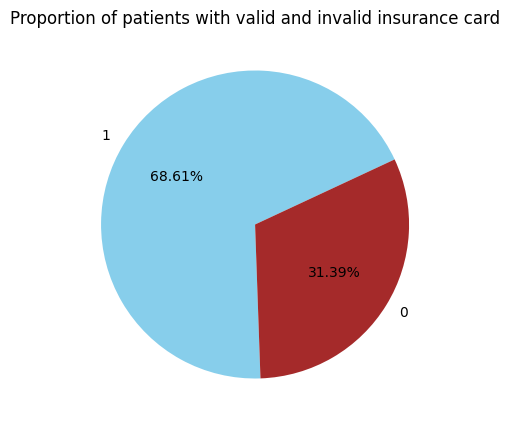

In [154]:
plt.figure(figsize=(5, 5))
plt.pie(Patient_counts, labels=Patient_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.title('Proportion of patients with valid and invalid insurance card')
plt.show()

### 2

In [100]:
Age_pressure = data.groupby('Age')['PR'].mean().reset_index()

In [101]:
Age_pressure

Age         PR
0    21  65.788462
1    22  63.307692
2    23  64.222222
3    24  65.027027
4    25  59.100000
5    26  62.800000
6    27  72.571429
7    28  68.269231
8    29  68.185185
9    30  65.375000
10   31  66.368421
11   32  69.000000
12   33  65.333333
13   34  75.333333
14   35  75.600000
15   36  75.230769
16   37  75.277778
17   38  71.230769
18   39  69.400000
19   40  65.500000
20   41  70.350000
21   42  72.076923
22   43  78.000000
23   44  54.285714
24   45  81.250000
25   46  74.727273
26   47  76.000000
27   48  79.333333
28   49  87.000000
29   50  82.000000
30   51  81.428571
31   52  83.200000
32   53  78.000000
33   54  93.500000
34   55  70.250000
35   56  78.500000
36   57  76.800000
37   58  78.285714
38   59  74.000000
39   60  80.000000
40   61  76.000000
41   62  71.500000
42   63  78.666667
43   64  78.000000
44   65  78.666667
45   66  84.000000
46   67  72.666667
47   69  80.000000
48   72   0.000000
49   81  74.000000

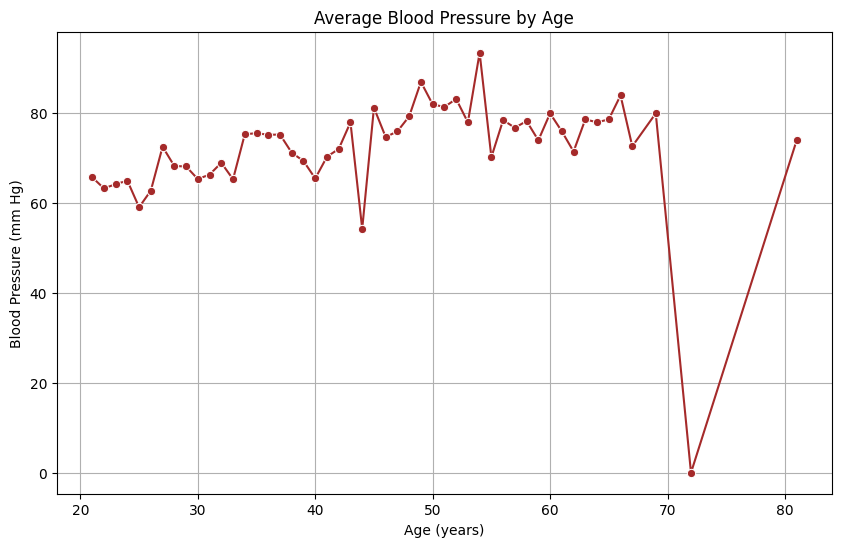

In [102]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='PR', data=Age_pressure, marker='o', color='brown')
plt.title('Average Blood Pressure by Age')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid(True)
plt.show()

In [103]:
Avg_M11_sepsis = data.groupby('Sepssis')['M11'].mean()

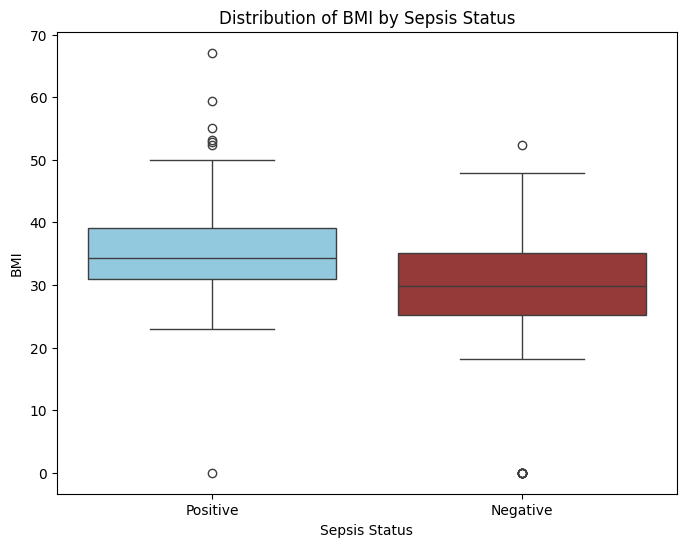

In [104]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sepssis', y='M11', data=data, palette=['skyblue', 'brown'])
plt.title('Distribution of BMI by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('BMI')
plt.show()

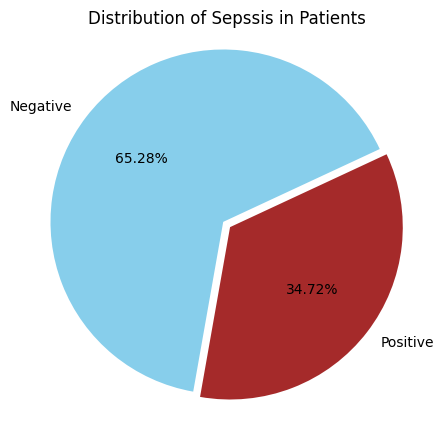

In [105]:
sepssis_counts = data['Sepssis'].value_counts()
explode = [0.05 if label == 'Positive' else 0 for label in sepssis_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(sepssis_counts, labels=sepssis_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.axis('equal')
plt.title('Distribution of Sepssis in Patients')
plt.show()

In [156]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [157]:
X = data.drop(columns=['Sepssis']) 

y = data['Sepssis']  

In [158]:
X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size = 0.25, random_state = 5, stratify = y)

In [159]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (449, 9)
X_eval shape: (150, 9)
y_train shape: (449,)
y_eval shape: (150,)


In [160]:
#Encoding dependent variables
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)




#selecting numeric  columns
numerical_cols=X_train.select_dtypes(include='number').columns

# Define the square root transformer
sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)

# Define numerical preprocessing pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('sqrt', sqrt_transformer),
    ('scaler', StandardScaler())
])

# Define the preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols)
])


In [161]:
models = {}
# Define models
models = {
    'Logistic_Regression': LogisticRegression(random_state=5),
    'Decision_Tree': DecisionTreeClassifier(random_state=5),
    'Random_Forest': RandomForestClassifier(random_state=5),
    'Gradient_Boosting': GradientBoostingClassifier(random_state=5)
}


Modeling Unbalanced Data

In [114]:
# Creating Pipeline

all_pipelines_unbalanced = {}
metric_table_unbalanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    unbalanced_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('classifier', classifier)  
    ])
        
    unbalanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_unbalanced[model_name] = unbalanced_pipeline
    
    y_pred=unbalanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_unbalanced.loc[len(metric_table_unbalanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_unbalanced.sort_values(by='f1-score', ascending=False)

model_name  accuracy  precision    recall  f1-score
0  Logistic_Regression  0.740000   0.732528  0.740000  0.733392
3    Gradient_Boosting  0.726667   0.727934  0.726667  0.727267
2        Random_Forest  0.700000   0.691852  0.700000  0.694348
1        Decision_Tree  0.640000   0.650255  0.640000  0.644134

Modelling BALANCED DATA


In [162]:
# Creating Pipeline

all_pipelines_balanced= {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    y_pred=balanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_balanced.sort_values(by='f1-score', ascending=False)

model_name  accuracy  precision    recall  f1-score
0  Logistic_Regression  0.720000   0.758604  0.720000  0.726672
3    Gradient_Boosting  0.673333   0.696314  0.673333  0.679879
2        Random_Forest  0.660000   0.668131  0.660000  0.663348
1        Decision_Tree  0.633333   0.645545  0.633333  0.638105

Hyperparameter Tuning on balanced

In [163]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numerical_cols),
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
param_grids = {
    'Logistic_Regression': {
        'logistic_regression__C': [1, 2, 3], 
        'logistic_regression__random_state':[1,2,3,4], 
        'logistic_regression__solver': ['newton-cg'], 
        'logistic_regression__multi_class': ['multinomial']},
    
    
    'Decision_Tree': {
        'decision_tree__max_depth': [2, 3, 4, 5, 6], 
        'decision_tree__random_state':[1,2,3,4,5], 
        'decision_tree__criterion': ['gini', 'entropy'], 
        'decision_tree__splitter': ['best', 'random'], 
        'decision_tree__max_features': ['sqrt', 'log2']},

    'Random_Forest': {
        'random_forest__n_estimators': [2, 5, 10, 15, 20], 
        'random_forest__max_depth': [5, 10, 20, 30], 
        'random_forest__random_state':[1,10,11,12,13,14], 
        'random_forest__criterion': ['gini', 'entropy'], 
        'random_forest__max_features': ['sqrt', 'log2'], 
        'random_forest__bootstrap': [True, False], 
        'random_forest__oob_score': [True, False]},
    
    'Gradient_Boosting': {
        'gradient_boosting__n_estimators': [10, 20, 30, 50, 60, 70], 
        'gradient_boosting__max_depth': [2, 3, 4, 5], 
        'gradient_boosting__learning_rate': [0.01, 0.1, 1], 
        'gradient_boosting__random_state':[1], 
        'gradient_boosting__loss': ['deviance', 'exponential'], 
        'gradient_boosting__criterion': ['friedman_mse', 'squared_error']},
    
    

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting']:
        print(f"\nTuning {model_name}...")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)


Tuning Logistic_Regression...
Best parameters: {'logistic_regression__C': 1, 'logistic_regression__multi_class': 'multinomial', 'logistic_regression__random_state': 1, 'logistic_regression__solver': 'newton-cg'}
Best score: 0.7388857968733574

Tuning Decision_Tree...
Best parameters: {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 2, 'decision_tree__max_features': 'sqrt', 'decision_tree__random_state': 1, 'decision_tree__splitter': 'best'}
Best score: 0.7708265077515876

Tuning Random_Forest...
Best parameters: {'random_forest__bootstrap': False, 'random_forest__criterion': 'gini', 'random_forest__max_depth': 20, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 15, 'random_forest__oob_score': False, 'random_forest__random_state': 12}
Best score: 0.7690395052097416

Tuning Gradient_Boosting...
Best parameters: {'gradient_boosting__criterion': 'friedman_mse', 'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__loss': 'exponential', 'grad

In [164]:
tuned_models_balanced = {}
tuned_models_balanced['Logistic_Regression_tunedb'] = LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg', random_state=1)
tuned_models_balanced['Decision_Tree_tunedb'] = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features='log2', splitter='best', random_state=5)
tuned_models_balanced['Random_Forest_tunedb'] = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=5, max_features='sqrt', n_estimators=15, oob_score=False, random_state=11)
tuned_models_balanced['Gradient_Boosting_tunedb'] = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.01, loss='exponential', max_depth=2, n_estimators=50, random_state=1)


In [167]:




# Ensure the directory for saving models exists
model_dir = "./Models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the label encoder
encoder_path = os.path.join(model_dir, "label_encoder.joblib")
joblib.dump(encoder, encoder_path)
print("Label encoder saved successfully.")

# Initialize the dictionary to store pipelines and the DataFrame for metrics
all_tuned_pipelines_balanced = {}
metric_table_balanced_tuned = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in tuned_models_balanced.items():
    # Define the pipeline with preprocessing, SMOTE, and the classifier
    tuned_balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline to the training data
    tuned_balanced_pipeline.fit(X_train, y_train_encode)
    
    # Save the fitted pipeline
    model_file_path = os.path.join(model_dir, f"{model_name}_pipeline.joblib")
    joblib.dump(tuned_balanced_pipeline, model_file_path)
    
    print(f"{model_name} pipeline saved successfully.")

    # Store the pipeline in the dictionary
    all_tuned_pipelines_balanced[model_name] = tuned_balanced_pipeline
    
    # Make predictions on the evaluation set
    y_pred = tuned_balanced_pipeline.predict(X_eval)
    
    # Calculate classification metrics
    metrics_tunedb = classification_report(y_eval_encode, y_pred, output_dict=True)
    
    # Extract relevant metrics
    accuracy = metrics_tunedb['accuracy']
    precision = metrics_tunedb['weighted avg']['precision']
    recall = metrics_tunedb['weighted avg']['recall']
    f1_score = metrics_tunedb['weighted avg']['f1-score']
    
    # Append metrics to the DataFrame
    metric_table_balanced_tuned.loc[len(metric_table_balanced_tuned)] = [model_name, accuracy, precision, recall, f1_score]

# Sort the metric table by f1-score in descending order
metric_table_balanced_tuned = metric_table_balanced_tuned.sort_values(by='f1-score', ascending=False)

# Display the sorted metric table
print(metric_table_balanced_tuned)


Label encoder saved successfully.
Logistic_Regression_tunedb pipeline saved successfully.
Decision_Tree_tunedb pipeline saved successfully.
Random_Forest_tunedb pipeline saved successfully.
Gradient_Boosting_tunedb pipeline saved successfully.
                   model_name  accuracy  precision    recall  f1-score
0  Logistic_Regression_tunedb  0.720000   0.758604  0.720000  0.726672
2        Random_Forest_tunedb  0.693333   0.722449  0.693333  0.700148
1        Decision_Tree_tunedb  0.673333   0.700613  0.673333  0.680386
3    Gradient_Boosting_tunedb  0.666667   0.696318  0.666667  0.674074


In [120]:
best_confusion_matrices = {}
best_pipelines = {}
best_metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in tuned_models_balanced.items(): 
    best_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    best_pipeline.fit(X_train, y_train_encode)
    best_pipelines[model_name] = best_pipeline
    
    y_pred=best_pipeline.predict(X_eval)
    
    best_conf_matrix = confusion_matrix(y_eval_encode, y_pred)
    
    best_confusion_matrices[model_name] = best_conf_matrix
    
    best_metrics = classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=best_metrics['accuracy']
    precision=best_metrics['weighted avg']['precision']
    recall=best_metrics['weighted avg']['recall']
    f1_score=best_metrics['weighted avg']['f1-score']
    
    best_metric_table.loc[len(best_metric_table)]=[model_name, accuracy, precision, recall, f1_score]

best_metric_table.sort_values(by='f1-score', ascending=False)

model_name  accuracy  precision    recall  f1-score
0  Logistic_Regression_tunedb  0.706667   0.745413  0.706667  0.713656
2        Random_Forest_tunedb  0.693333   0.717980  0.693333  0.699731
1        Decision_Tree_tunedb  0.680000   0.714071  0.680000  0.687427
3    Gradient_Boosting_tunedb  0.673333   0.688375  0.673333  0.678481

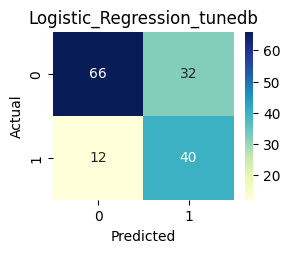

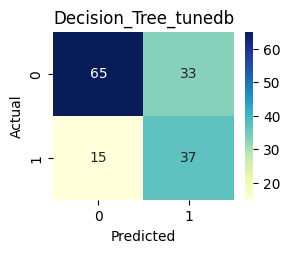

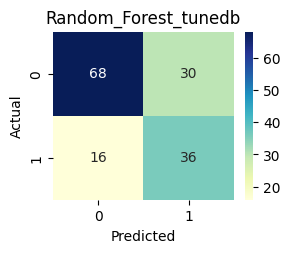

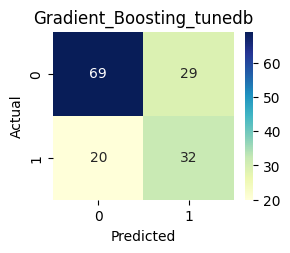

In [121]:
for i, (model_name, confusion_mat) in enumerate(best_confusion_matrices.items()):
    
    plt.subplot(2, 2, i + 1)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

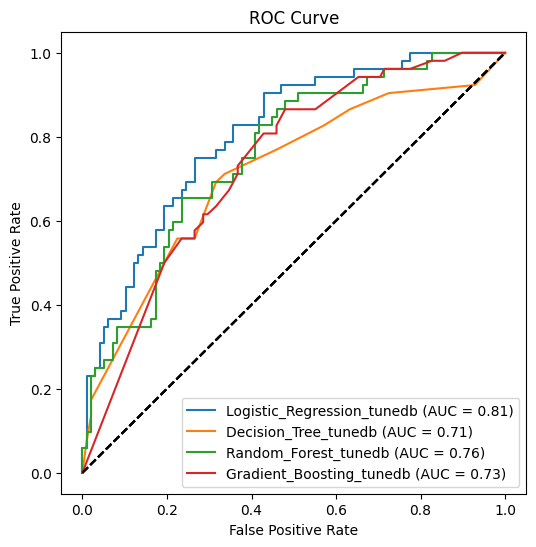

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))
best_confusion_matrices = {}

all_roc_data = {}

# Iterate over the dictionary items directly
for model_name, pipeline in best_pipelines.items():
    
    # Check if the classifier is LinearSVC
    if isinstance(pipeline.named_steps['classifier'], LinearSVC):
        # Fit the pipeline first
        pipeline.fit(X_train, y_train_encode)
        # Wrap LinearSVC with CalibratedClassifierCV
        calibrated_pipeline = CalibratedClassifierCV(pipeline.named_steps['classifier'], method='sigmoid', cv='prefit')
        # Fit the CalibratedClassifierCV instance with training data
        calibrated_pipeline.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train_encode)
        y_score = calibrated_pipeline.predict_proba(pipeline.named_steps['preprocessor'].transform(X_eval))[:, 1]
    else:
        # For classifiers that have predict_proba directly
        y_score = pipeline.predict_proba(X_eval)[:, 1]
    
        fpr, tpr, thresholds = roc_curve(y_eval_encode, y_score)
        roc_auc = auc(fpr, tpr)
    
    
        roc_data_df = pd.DataFrame({'false_positive_rate': fpr, 'true_positive_rate': tpr, 'thresholds': thresholds})
    
        # Store the ROC data in the dictionary
        all_roc_data[model_name] = roc_data_df
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_ylabel('True Positive Rate')
        ax.set_xlabel('False Positive Rate')
        ax.set_title('ROC Curve')
        ax.legend(loc="lower right")
plt.show()

In [ ]:
best_pipelines 

{'Logistic_Regression_tunedb': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeliner',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('sqrt',
                                                                    FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                 ('smote', SMOTE(random_state=5)),
                 ('classifier',
                  LogisticRegression(C=1, multi_class='multinomial',
                                     random_state=1, solver='newt

In [ ]:
all_roc_data['Random_Forest_tunedb']

false_positive_rate  true_positive_rate  thresholds
0              0.000000            0.000000         inf
1              0.000000            0.019231    0.950282
2              0.000000            0.057692    0.909276
3              0.010204            0.057692    0.841797
4              0.010204            0.096154    0.813690
5              0.020408            0.096154    0.811409
6              0.020408            0.230769    0.769411
7              0.030612            0.230769    0.764567
8              0.030612            0.250000    0.741302
9              0.051020            0.250000    0.732382
10             0.051020            0.269231    0.727232
11             0.071429            0.269231    0.716889
12             0.071429            0.307692    0.714171
13             0.081633            0.307692    0.712712
14             0.081633            0.346154    0.707723
15             0.163265            0.346154    0.684733
16             0.163265            0.365385    0.675144
17             0.173469            0.365385    0.674797
18             0.173469            0.480769    0.656438
19             0.183673            0.480769    0.649948
20             0.183673            0.500000    0.648870
21             0.193878            0.500000    0.646221
22             0.193878            0.538462    0.642133
23             0.204082            0.538462    0.636074
24             0.204082            0.576923    0.627071
25             0.214286            0.576923    0.621382
26             0.214286            0.596154    0.618807
27             0.234694            0.596154    0.595017
28             0.234694            0.653846    0.554539
29             0.306122            0.653846    0.518304
30             0.306122            0.692308    0.502740
31             0.357143            0.692308    0.462668
32             0.357143            0.711538    0.457832
33             0.377551            0.711538    0.450233
34             0.377551            0.750000    0.443405
35             0.408163            0.750000    0.435288
36             0.408163            0.807692    0.420424
37             0.418367            0.807692    0.419761
38             0.418367            0.826923    0.417531
39             0.448980            0.826923    0.402818
40             0.448980            0.846154    0.398724
41             0.459184            0.846154    0.388450
42             0.459184            0.865385    0.382596
43             0.479592            0.865385    0.366956
44             0.479592            0.884615    0.362145
45             0.510204            0.884615    0.358430
46             0.510204            0.903846    0.355234
47             0.663265            0.903846    0.298979
48             0.663265            0.923077    0.278637
49             0.673469            0.923077    0.275672
50             0.673469            0.942308    0.272861
51             0.714286            0.942308    0.259129
52             0.714286            0.961538    0.247624
53             0.816327            0.961538    0.156264
54             0.816327            0.980769    0.139760
55             0.826531            0.980769    0.134651
56             0.826531            1.000000    0.131611
57             1.000000            1.000000    0.027346

In [ ]:
Random_F_pipeline = best_pipelines['Random_Forest_tunedb']
Random_F_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sqrt',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=5,
                                        n_estimators=15, random_state=11))])

<Axes: >

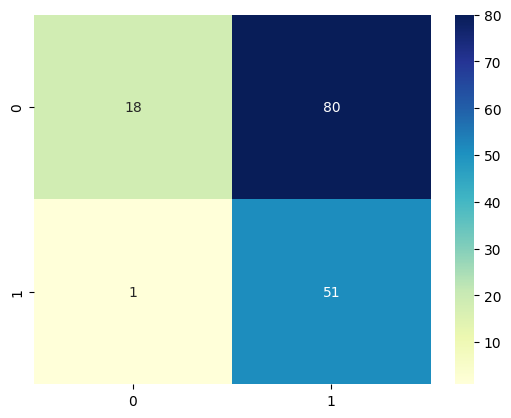

In [ ]:
threshold = 0.134651

y_pred_proba = Random_F_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
all_roc_data['Logistic_Regression_tunedb']

false_positive_rate  true_positive_rate  thresholds
0              0.000000            0.000000         inf
1              0.000000            0.019231    0.979822
2              0.000000            0.057692    0.956623
3              0.010204            0.057692    0.943041
4              0.010204            0.230769    0.888284
5              0.030612            0.230769    0.856183
6              0.030612            0.250000    0.851693
7              0.040816            0.250000    0.818236
8              0.040816            0.307692    0.809605
9              0.051020            0.307692    0.806810
10             0.051020            0.346154    0.798587
11             0.061224            0.346154    0.798323
12             0.061224            0.365385    0.794007
13             0.091837            0.365385    0.775606
14             0.091837            0.384615    0.773460
15             0.102041            0.384615    0.759186
16             0.102041            0.442308    0.752777
17             0.122449            0.442308    0.749580
18             0.122449            0.500000    0.700867
19             0.132653            0.500000    0.688990
20             0.132653            0.519231    0.674722
21             0.142857            0.519231    0.673191
22             0.142857            0.538462    0.661370
23             0.173469            0.538462    0.652961
24             0.173469            0.576923    0.649251
25             0.193878            0.576923    0.632941
26             0.193878            0.634615    0.614768
27             0.214286            0.634615    0.603086
28             0.214286            0.653846    0.593498
29             0.234694            0.653846    0.579456
30             0.234694            0.673077    0.571955
31             0.244898            0.673077    0.570871
32             0.244898            0.692308    0.558885
33             0.265306            0.692308    0.557310
34             0.265306            0.750000    0.545894
35             0.316327            0.750000    0.522542
36             0.316327            0.769231    0.520863
37             0.336735            0.769231    0.490898
38             0.336735            0.788462    0.488810
39             0.357143            0.788462    0.486203
40             0.357143            0.826923    0.474969
41             0.418367            0.826923    0.443916
42             0.418367            0.846154    0.436809
43             0.428571            0.846154    0.435013
44             0.428571            0.903846    0.413498
45             0.469388            0.903846    0.395038
46             0.469388            0.923077    0.392498
47             0.551020            0.923077    0.353567
48             0.551020            0.942308    0.348506
49             0.642857            0.942308    0.291527
50             0.642857            0.961538    0.290616
51             0.755102            0.961538    0.217462
52             0.755102            0.980769    0.216108
53             0.775510            0.980769    0.189095
54             0.775510            1.000000    0.182480
55             1.000000            1.000000    0.000267

In [ ]:
LogisticRegression_pipeline = best_pipelines['Logistic_Regression_tunedb']
LogisticRegression_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sqrt',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 LogisticRegression(C=1, multi_class='multinomial',
                                    random_state=1, solver='newton-cg'))])

<Axes: >

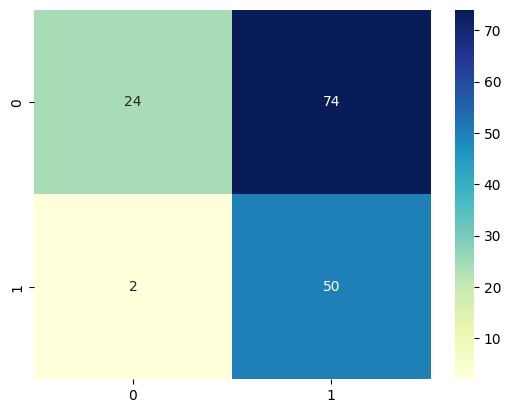

In [ ]:
threshold = 0.216108

y_pred_proba = LogisticRegression_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
all_roc_data['Decision_Tree_tunedb'].tail(40)

false_positive_rate  true_positive_rate  thresholds
0              0.000000            0.000000         inf
1              0.010204            0.076923    0.965517
2              0.020408            0.134615    0.960000
3              0.020408            0.173077    0.840000
4              0.204082            0.519231    0.783217
5              0.224490            0.557692    0.736842
6              0.265306            0.557692    0.692308
7              0.316327            0.692308    0.550000
8              0.336735            0.711538    0.545455
9              0.459184            0.769231    0.365079
10             0.571429            0.826923    0.323529
11             0.632653            0.865385    0.200000
12             0.724490            0.903846    0.162791
13             0.928571            0.923077    0.045977
14             1.000000            1.000000    0.000000

In [ ]:
Decisiontree_pipeline = best_pipelines['Decision_Tree_tunedb']
Decisiontree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sqrt',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=4, max_features='log2',
                                        random_state=5))])

<Axes: >

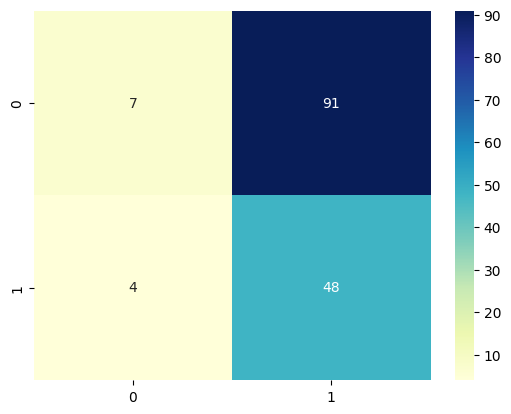

In [ ]:
threshold = 0.045977

y_pred_proba = Decisiontree_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
GB_threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(GB_threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Testing the models

In [ ]:
pfiles_test = pd.read_csv('./Data/Paitients_Files_Test.csv')
pfiles_test.head()

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0

In [ ]:
rf_sepsis = Random_F_pipeline.predict(pfiles_test)

In [ ]:
pfiles_test['rf_sepsis'] = encoder.inverse_transform(rf_sepsis)

pfiles_test.head(10)

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  \
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1   
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1   
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1   
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1   
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0   
5  ICU200614    4  183   0   0    0  28.4  0.212   36          1   
6  ICU200615    1  124  60  32    0  35.8  0.514   21          1   
7  ICU200616    1  181  78  42  293  40.0  1.258   22          1   
8  ICU200617    1   92  62  25   41  19.5  0.482   25          0   
9  ICU200618    0  152  82  39  272  41.5  0.270   27          0   

  Decisiontree_pred LR_sepsis rf_sepsis  
0          Positive  Negative  Negative  
1          Negative  Negative  Negative  
2          Negative  Negative  Negative  
3          Negative  Negative  Negative  
4          Positive  Positive  Positive  
5          Positive  Positive  Positive  
6          Negative  Positive  Negative  
7          Negative  Positive  Positive  
8          Negative  Negative  Negative  
9          Positive  Positive  Positive

DECISION TREE MODEL TESTING

In [ ]:
Decisiontree_pred_Sepsis = Decisiontree_pipeline.predict(pfiles_test)
Decisiontree_pred_Sepsis

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
encoder.inverse_transform(Decisiontree_pred_Sepsis)

array(['Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negati

In [ ]:
pfiles_test['Decisiontree_pred'] = encoder.inverse_transform(Decisiontree_pred_Sepsis)
pfiles_test.head(10)

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  \
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1   
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1   
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1   
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1   
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0   
5  ICU200614    4  183   0   0    0  28.4  0.212   36          1   
6  ICU200615    1  124  60  32    0  35.8  0.514   21          1   
7  ICU200616    1  181  78  42  293  40.0  1.258   22          1   
8  ICU200617    1   92  62  25   41  19.5  0.482   25          0   
9  ICU200618    0  152  82  39  272  41.5  0.270   27          0   

  Decisiontree_pred  
0          Positive  
1          Negative  
2          Negative  
3          Negative  
4          Positive  
5          Positive  
6          Negative  
7          Negative  
8          Negative  
9          Positive

Predicting with Logistic Regression

In [ ]:
LR_pred_sepsis = LogisticRegression_pipeline.predict(pfiles_test)
LR_pred_sepsis

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
pfiles_test['LR_sepsis'] = encoder.inverse_transform(LR_pred_sepsis)

pfiles_test.head(10)

ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  \
0  ICU200609    1  109  38  18  120  23.1  0.407   26          1   
1  ICU200610    1  108  88  19    0  27.1  0.400   24          1   
2  ICU200611    6   96   0   0    0  23.7  0.190   28          1   
3  ICU200612    1  124  74  36    0  27.8  0.100   30          1   
4  ICU200613    7  150  78  29  126  35.2  0.692   54          0   
5  ICU200614    4  183   0   0    0  28.4  0.212   36          1   
6  ICU200615    1  124  60  32    0  35.8  0.514   21          1   
7  ICU200616    1  181  78  42  293  40.0  1.258   22          1   
8  ICU200617    1   92  62  25   41  19.5  0.482   25          0   
9  ICU200618    0  152  82  39  272  41.5  0.270   27          0   

  Decisiontree_pred LR_sepsis  
0          Positive  Negative  
1          Negative  Negative  
2          Negative  Negative  
3          Negative  Negative  
4          Positive  Positive  
5          Positive  Positive  
6          Negative  Positive  
7          Negative  Positive  
8          Negative  Negative  
9          Positive  Positive

In [166]:
joblib.dump(encoder, './models/encoder.joblib')

['./models/encoder.joblib']